In [81]:
import pandas as pd
import numpy as np
import os
import random
from scipy.stats import pearsonr,spearmanr
from matplotlib import pyplot as plt
import seaborn as sns

Age
CSA ctx-rh-precentral 0.10383940866643727
CT ctx-rh-pericalcarine 0.20432817682244908
FC 58 0.1449491077920988
BMI
CSA ctx-lh-rostralanteriorcingulate 0.060419816945937975
CT ctx-rh-superiorparietal 0.07276080799259453
FC 34 0.07889090701633271
IQ
CSA ctx-lh-superiortemporal 0.029927132896150344
CT ctx-rh-superiorfrontal 0.02436785844004594
FC 21 0.049175339471431684
NM
CSA ctx-rh-superiortemporal 0.036605999031031136
CT ctx-rh-superiorparietal 0.022552828397545813
FC 72 0.06030236091847194
NS
CSA ctx-lh-parahippocampal 0.021681001159871226
CT ctx-lh-parahippocampal 0.025717725569617798
FC 103 0.04775521154665141
alcohol
CSA ctx-rh-frontalpole 0.01980199096051601
CT ctx-lh-superiorfrontal 0.049485084854211915
FC 145 0.039474051561890204
BM
CSA ctx-rh-fusiform 0.01582566485284138
CT ctx-lh-paracentral 0.01596749380653643
FC 77 0.015246125392161898


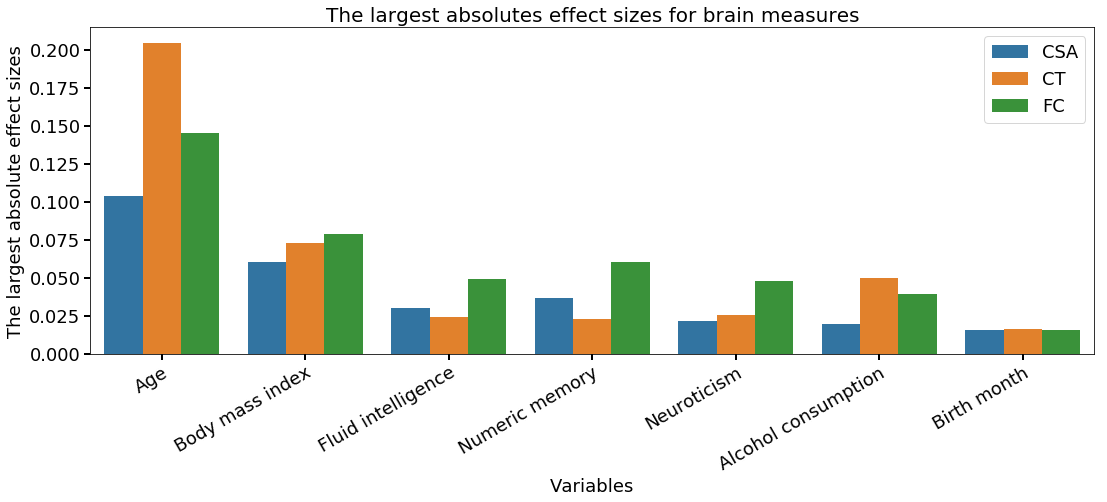

In [82]:
# show the largest absolute effect sizes for brain associations
path1 = 'correlations_full_sample/'
phenos = ['Age','BMI','IQ','NM','NS','alcohol','BM']
xlabels = ['Age', 'Body mass index','Fluid intelligence','Numeric memory', \
           'Neuroticism', 'Alcohol consumption','Birth month']

regions = pd.read_csv('raw_data/Area_items.csv').iloc[:,-1].values.tolist()
best_effect_sizes = []
effect_sizes = np.zeros((len(phenos),3))
groups = []
my_traits = []
for i in range(len(phenos)):
    pheno = phenos[i]
    CSA_corr = abs(pd.read_csv(path1+'CSA_'+pheno+'.csv').iloc[:,0].values)
    CT_corr = abs(pd.read_csv(path1+'CT_'+pheno+'.csv').iloc[:,0].values)
    FC_corr = abs(pd.read_csv(path1+'FC_'+pheno+'.csv').iloc[:,0].values)
    
    best_effect_sizes.append(np.max(CSA_corr))
    best_effect_sizes.append(np.max(CT_corr))
    best_effect_sizes.append(np.max(FC_corr))
    
    effect_sizes[i,0] = np.max(CSA_corr)
    effect_sizes[i,1] = np.max(CT_corr)
    effect_sizes[i,2] = np.max(FC_corr)
    
    print(pheno)
    print("CSA",regions[np.argmax(CSA_corr)],np.max(CSA_corr))
    print("CT",regions[np.argmax(CT_corr)],np.max(CT_corr))
    print("FC",np.argmax(FC_corr)+1,np.max(FC_corr))
    
    groups.append('CSA')
    groups.append('CT')
    groups.append('FC')
    
    my_traits.append(xlabels[i])
    my_traits.append(xlabels[i])
    my_traits.append(xlabels[i])
    
df1 = pd.DataFrame(data=best_effect_sizes,columns=['Best effect size'])
df1['trait'] = my_traits
df1['group'] = groups

fig = plt.figure(figsize=(18,6)) 
ax = sns.barplot(x='trait', y='Best effect size', hue='group',data=df1)
plt.title("The largest absolutes effect sizes for brain measures",fontsize=20)
plt.tick_params(direction='out', length=6, width=2,labelsize=18)
plt.ylabel('The largest absolute effect sizes',fontsize=18)
plt.xlabel('Variables',fontsize=18)
x = np.arange(0,len(phenos))
plt.xticks(x,xlabels,rotation=30, rotation_mode="anchor", ha="right")
plt.legend(prop={'size': 18},)
output_path = 'statistical_figures/best_effect_size.png'
fig.savefig(output_path,dpi=300,bbox_inches = 'tight')

In [83]:
from statsmodels.stats import multitest

def fdr_correction(P):
    size = P.shape
    temp_p = P.flatten()
    Ps = multitest.multipletests(temp_p,alpha=0.05,method='fdr_bh')
    P_corrected = Ps[1].reshape(size)

    return P_corrected

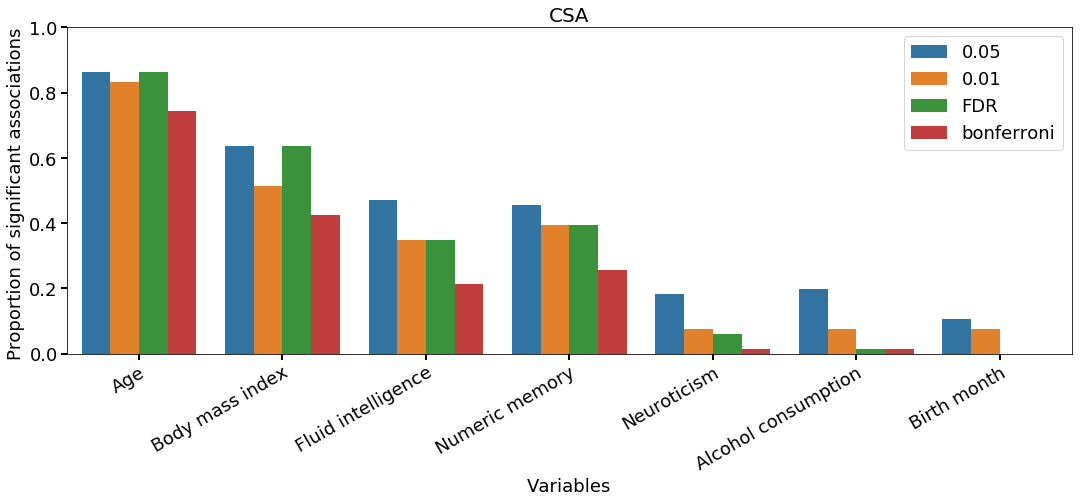

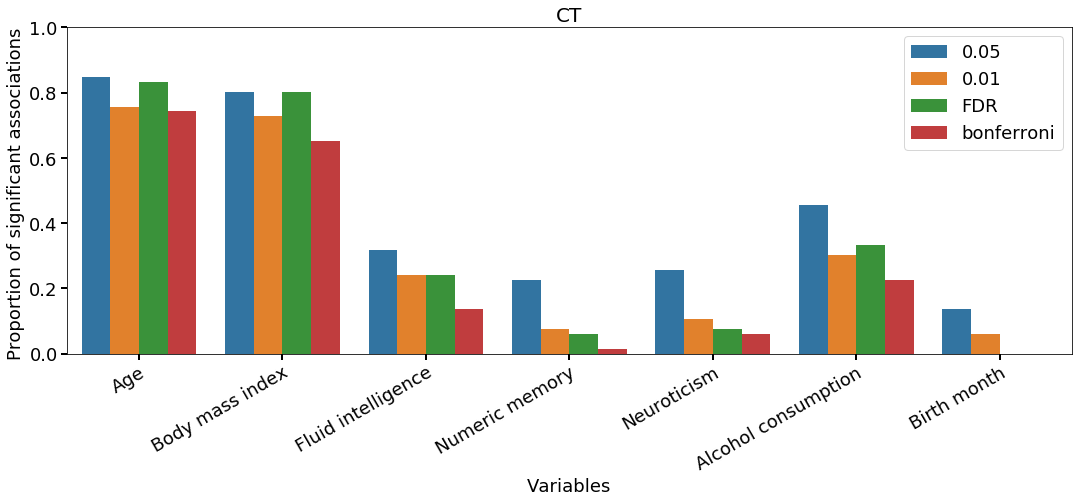

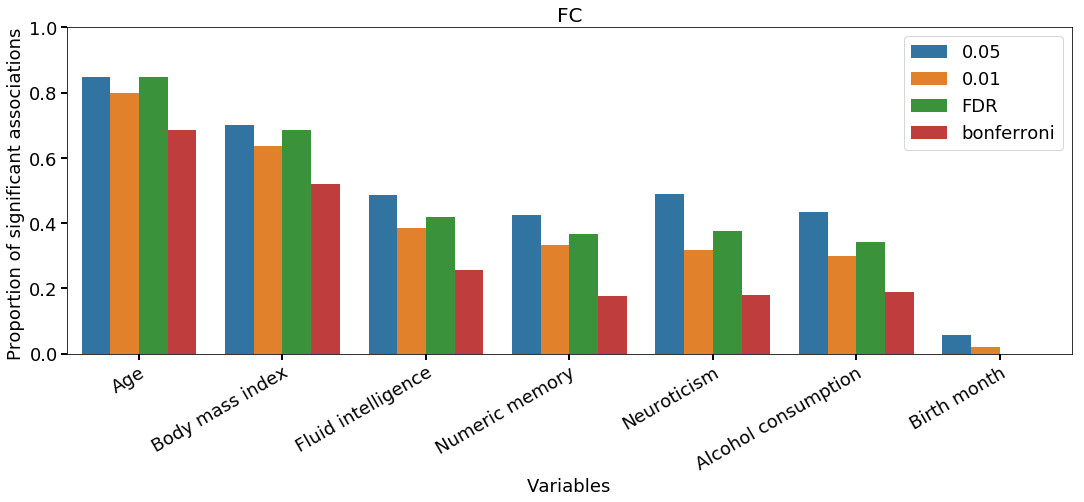

In [84]:
# Show the number of signficant brain associations at different significance level
mytypes = ['CSA','CT','FC']
for mytype in mytypes:
    Numbers = []
    groups = []
    my_traits = []
    for i in range(len(phenos)):
        pheno = phenos[i]
        P = pd.read_csv(path1+mytype+'_'+pheno+'.csv').iloc[:,1].values
        
        Numbers.append(np.sum(P < 0.05)/P.shape[0])
        Numbers.append(np.sum(P < 0.01)/P.shape[0])
        FDR_P = fdr_correction(P)
        Numbers.append(np.sum(FDR_P < 0.05)/P.shape[0])
        Numbers.append(np.sum(P < 0.05/P.shape[0])/P.shape[0])
        
        groups.append('0.05')
        groups.append('0.01')
        groups.append('FDR')
        groups.append('bonferroni')
        
        my_traits.append(xlabels[i])
        my_traits.append(xlabels[i])
        my_traits.append(xlabels[i])
        my_traits.append(xlabels[i])
    
    df1 = pd.DataFrame(data=Numbers,columns=['Number of selected brain measures'])
    df1['trait'] = my_traits
    df1['group'] = groups
    
    fig = plt.figure(figsize=(18,6)) 
    ax = sns.barplot(x='trait', y='Number of selected brain measures', hue='group',data=df1)
    plt.title(mytype,fontsize=20)
    plt.tick_params(direction='out', length=6, width=2,labelsize=18)
    plt.ylabel('Proportion of significant associations ',fontsize=18)
    plt.xlabel('Variables',fontsize=18)
    x = np.arange(0,len(phenos))
    plt.xticks(x,xlabels,rotation=30, rotation_mode="anchor", ha="right")
    plt.ylim(0,1)
    plt.legend(prop={'size': 18},)
    output_path = 'statistical_figures/count_'+mytype+'.png'
    fig.savefig(output_path,dpi=300,bbox_inches = 'tight')       

CSA Age 0.05 47
CSA Body mass index 0.05 27
CSA Fluid intelligence 0.05 8
CSA Numeric memory 0.05 13
CSA Neuroticism 0.05 0
CSA Alcohol consumption 0.05 0
CSA Birth month 0.05 0
CT Age 0.05 48
CT Body mass index 0.05 40
CT Fluid intelligence 0.05 2
CT Numeric memory 0.05 0
CT Neuroticism 0.05 2
CT Alcohol consumption 0.05 11
CT Birth month 0.05 0
FC Age 0.05 139
FC Body mass index 0.05 106
FC Fluid intelligence 0.05 50
FC Numeric memory 0.05 34
FC Neuroticism 0.05 31
FC Alcohol consumption 0.05 35
FC Birth month 0.05 0


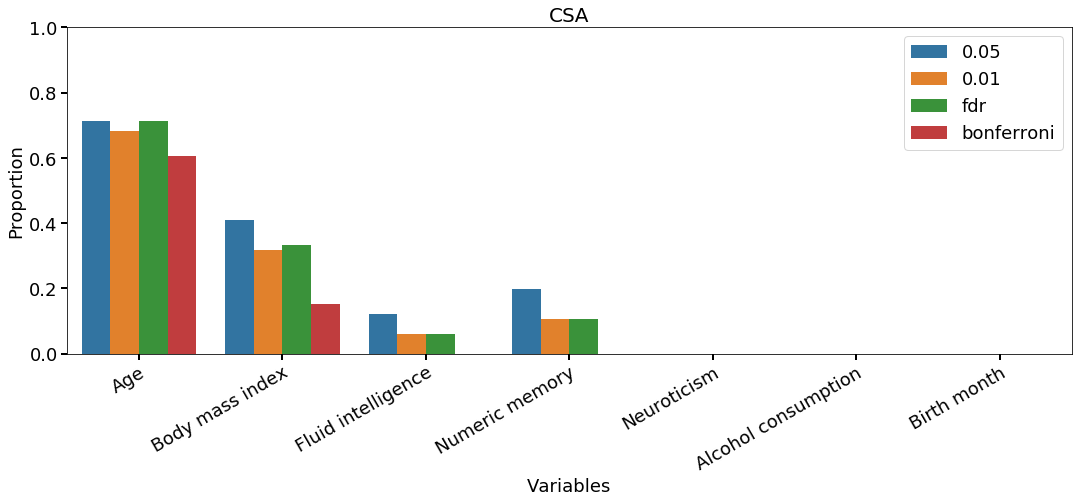

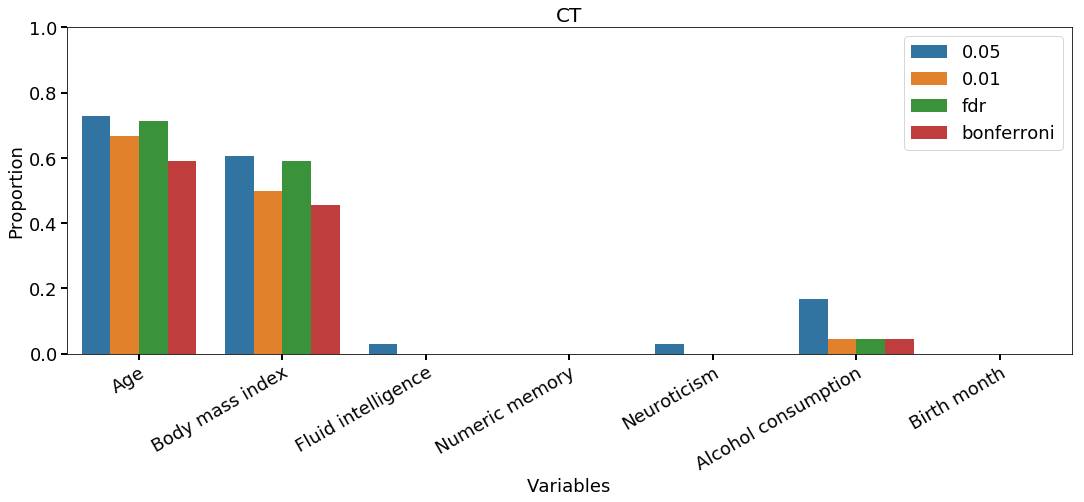

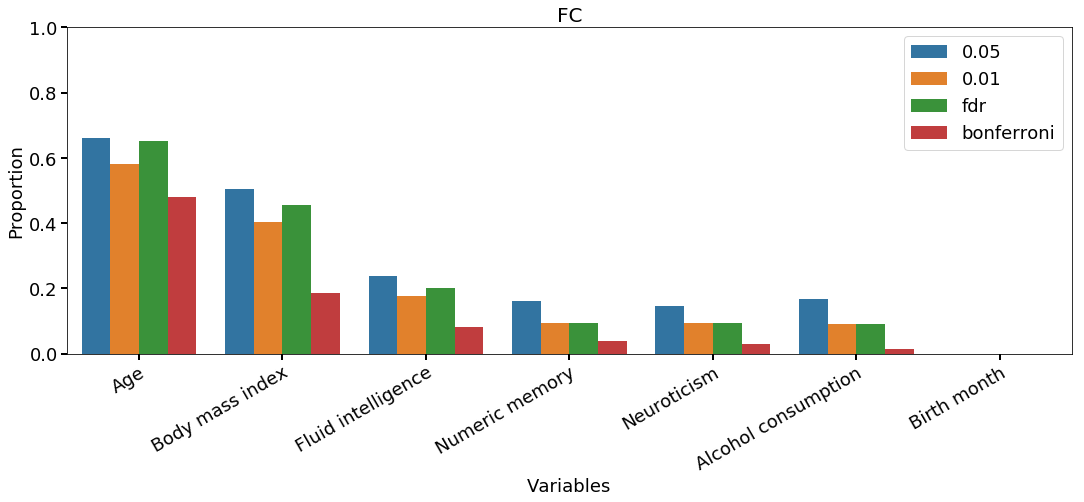

In [97]:
# Show the porportion of replicable brain asscoiations
mytypes = ['CSA','CT','FC']
ts = ['0.05','0.01','fdr','bonferroni']
for mytype in mytypes:
    Numbers = []
    groups = []
    my_traits = []
    for i in range(len(phenos)):
        pheno = phenos[i]
        for t in ts:
            file_path = 'regional_replicability/'+pheno+'/MIN_size_'+mytype +'_'+t+'.csv'
            tmp_data = pd.read_csv(file_path).iloc[:,0].values
            if mytype == 'FC':
                Numbers.append(np.sum(tmp_data > 0)/210)
            else:
                Numbers.append(np.sum(tmp_data > 0)/66)
            
            groups.append(t)
            my_traits.append(xlabels[i])
            if t == '0.05':
                print(mytype, xlabels[i],t,np.sum(tmp_data > 0))
            
    df1 = pd.DataFrame(data=Numbers,columns=['Number of selected brain measures'])
    df1['trait'] = my_traits
    df1['group'] = groups
    
    fig = plt.figure(figsize=(18,6)) 
    ax = sns.barplot(x='trait', y='Number of selected brain measures', hue='group',data=df1)
    plt.title(mytype,fontsize=20)
    plt.tick_params(direction='out', length=6, width=2,labelsize=18)
    plt.ylabel('Proportion',fontsize=18)
    plt.xlabel('Variables',fontsize=18)
    x = np.arange(0,len(phenos))
    plt.xticks(x,xlabels,rotation=30, rotation_mode="anchor", ha="right")
    plt.ylim(0,1)
    plt.legend(prop={'size': 18},)
    output_path = 'statistical_figures/stable_'+mytype+'.png'
    fig.savefig(output_path,dpi=300,bbox_inches = 'tight')

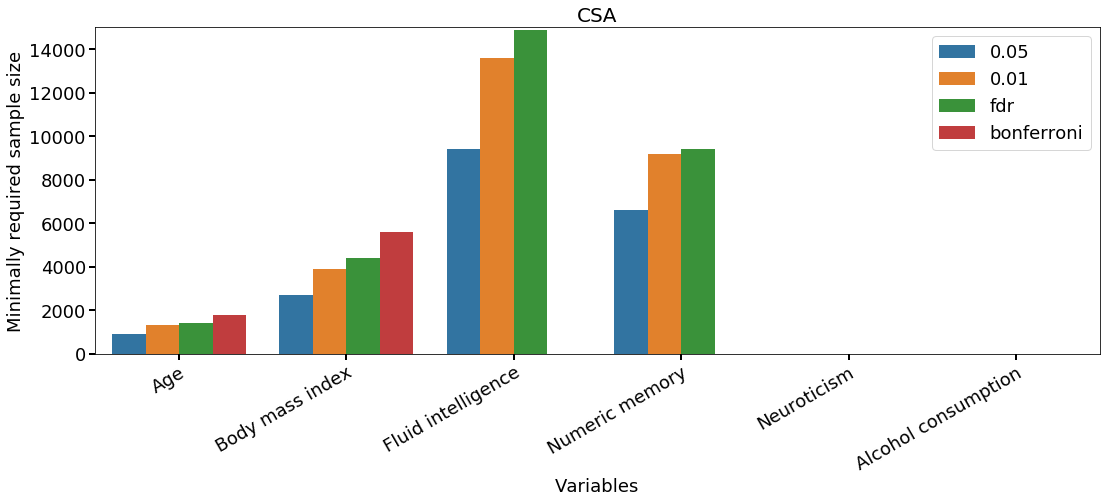

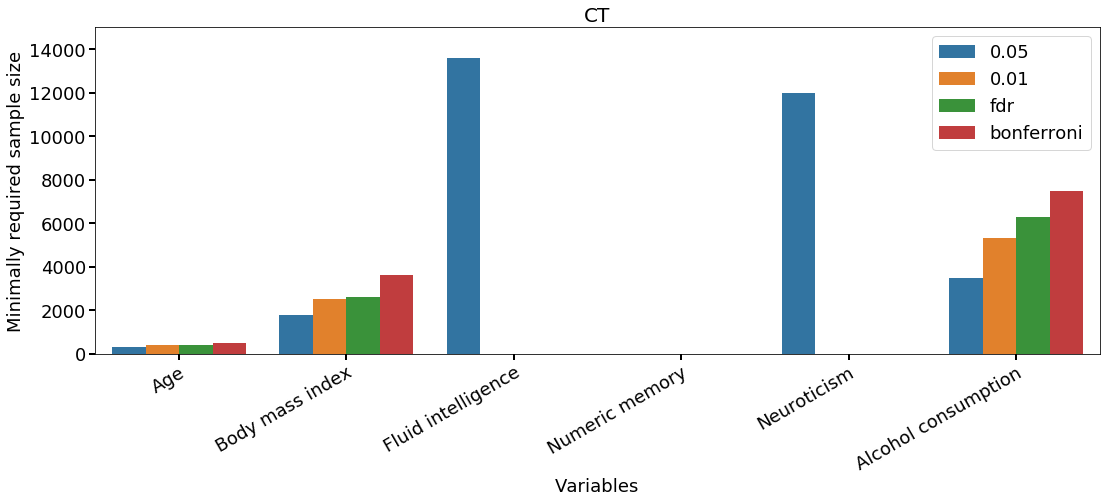

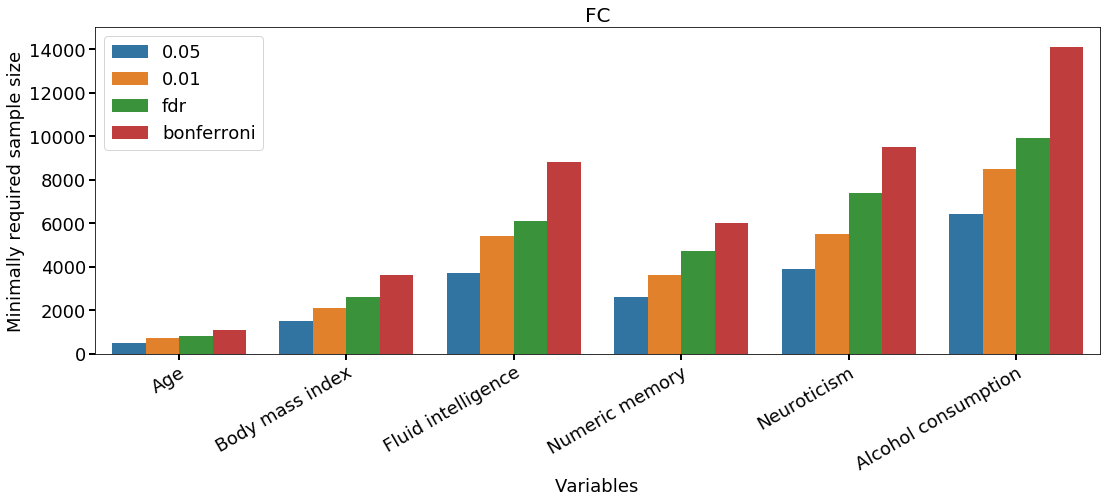

In [96]:
#Show minimally required sample sizes for replicable brain associations
mytypes = ['CSA','CT','FC']
ts = ['0.05','0.01','fdr','bonferroni']
for mytype in mytypes:
    Numbers = []
    groups = []
    my_traits = []
    for i in range(len(phenos)):
        pheno = phenos[i]
        if pheno == 'BM':
            continue
        for t in ts:
            file_path = 'regional_replicability/'+pheno+'/MIN_size_'+mytype +'_'+t+'.csv'
            tmp_data = pd.read_csv(file_path)
            tmp_data = tmp_data[tmp_data.iloc[:,0] > 0]
            tmp_data = tmp_data.iloc[:,0].values
            if tmp_data.shape[0] == 0:
                Numbers.append(0)
            else:
                Numbers.append(np.min(tmp_data)*100)
            
            groups.append(t)
            my_traits.append(xlabels[i])
            
    df1 = pd.DataFrame(data=Numbers,columns=['Number of selected brain measures'])
    df1['trait'] = my_traits
    df1['group'] = groups
    
    fig = plt.figure(figsize=(18,6)) 
    ax = sns.barplot(x='trait', y='Number of selected brain measures', hue='group',data=df1)
    plt.title(mytype,fontsize=20)
    plt.tick_params(direction='out', length=6, width=2,labelsize=18)
    plt.ylabel('Minimally required sample size',fontsize=18)
    plt.xlabel('Variables',fontsize=18)
    x = np.arange(0,len(phenos)-1)
    plt.xticks(x,xlabels[:-1],rotation=30, rotation_mode="anchor", ha="right")
    plt.ylim(0,15000)
    plt.legend(prop={'size': 18},)
    output_path = 'statistical_figures/minimally_required_sample_size_'+mytype+'.png'
    fig.savefig(output_path,dpi=300,bbox_inches = 'tight')

0.9928698979591832


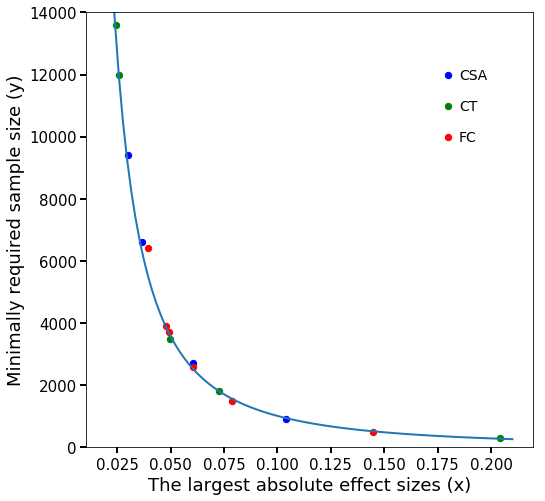

In [101]:
# Show the replationships between effect sizes and minimally required sample sizes
required_sample_sizes = pd.read_csv('minimal_required_sample_sizes.csv')
X = []
Y = []
tmp_effect_sizes = effect_sizes[:-1,:].T.flatten()
for i in range(required_sample_sizes.shape[0]):
    if required_sample_sizes['correlations'].iloc[i] > 0:
        X.append(tmp_effect_sizes[i])
        Y.append(required_sample_sizes['correlations'].iloc[i])
        
tmp_data = pd.DataFrame(data=Y,columns=['Minimal required sample size'])
tmp_data['Best effect size'] = X
tmp_data.to_csv('tmp_data.csv',index=False)
print(spearmanr(X,Y)[0]*spearmanr(X,Y)[0])
fig = plt.figure(figsize=(8,8)) 

for i in range(tmp_data.shape[0]):
    x = tmp_data.iloc[i,0]
    y = tmp_data.iloc[i,1]
    if i < 4:
        my_color = 'b'
    elif i < 9:
        my_color = 'g'
    else:
        my_color = 'r'
    plt.scatter(y,x,c=my_color,s=40)
    
# Power Regression are done by link: https://www.statology.org/power-regression-calculator/
x = np.linspace(0.02, 0.21, num=100)
plt.plot(x,15.29*pow(x,-1.82), linewidth=2)

plt.scatter(0.18,12000,c='b',s=40)
plt.text(0.185,11850, 'CSA', fontsize=14, horizontalalignment='left')
plt.scatter(0.18,11000,c='g',s=40)
plt.text(0.185,10850, 'CT', fontsize=14, horizontalalignment='left')
plt.scatter(0.18,10000,c='r',s=40)
plt.text(0.185,9850, 'FC', fontsize=14, horizontalalignment='left')

plt.tick_params(direction='out', length=6, width=2,labelsize=15)
plt.ylabel('Minimally required sample size (y)',fontsize=18)
plt.xlabel('The largest absolute effect sizes (x)',fontsize=18)
plt.ylim([0, 14000])
output_path = 'statistical_figures/Minimal_size_to_best_effect_size2.png'
plt.show()
fig.savefig(output_path,dpi=300,bbox_inches = 'tight')

In [86]:
de_sample_sizes = []
de_sample_sizes_proportions = []
groups = []
my_traits = []

for i in range(required_sample_sizes.shape[0]):
    
    x1 = required_sample_sizes['correlations'].iloc[i]
    x2 = required_sample_sizes['ttest_0.25'].iloc[i]
    
    if x1 == -1 or x2 == -1:
        de_sample_sizes.append(0)
        de_sample_sizes_proportions.append(0)
    else:
        de_sample_sizes.append(x1 - x2)
        de_sample_sizes_proportions.append(100*(x1-x2)/x1)
    groups.append(required_sample_sizes['imaging_type'].iloc[i])
    my_traits.append(xlabels[i%6])

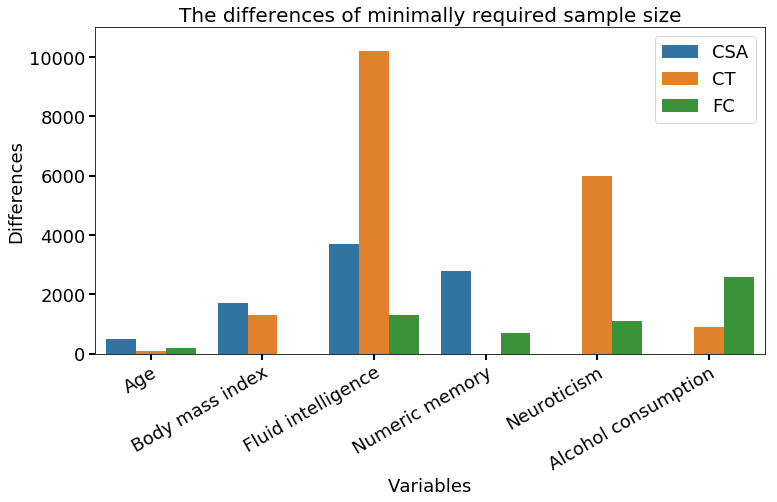

In [87]:
# Show the difference of required sample sizes between correlation analysis and two sample t test by 25% sample pre-selection
df1 = pd.DataFrame(data=de_sample_sizes,columns=['Decreased minimal sample size'])
df1['trait'] = my_traits
df1['group'] = groups

fig = plt.figure(figsize=(12,6)) 
ax = sns.barplot(x='trait', y='Decreased minimal sample size', hue='group',data=df1)
plt.title("The differences of minimally required sample size",fontsize=20)
plt.tick_params(direction='out', length=6, width=2,labelsize=18)
plt.ylabel('Differences',fontsize=18)
plt.xlabel('Variables',fontsize=18)
x = np.arange(0,6)
plt.ylim([0, 11000])
plt.xticks(x,xlabels[:6],rotation=30, rotation_mode="anchor", ha="right")
    
plt.legend(prop={'size': 18},)
output_path = 'statistical_figures/Decreased minimal sample size.png'
fig.savefig(output_path,dpi=300,bbox_inches = 'tight')

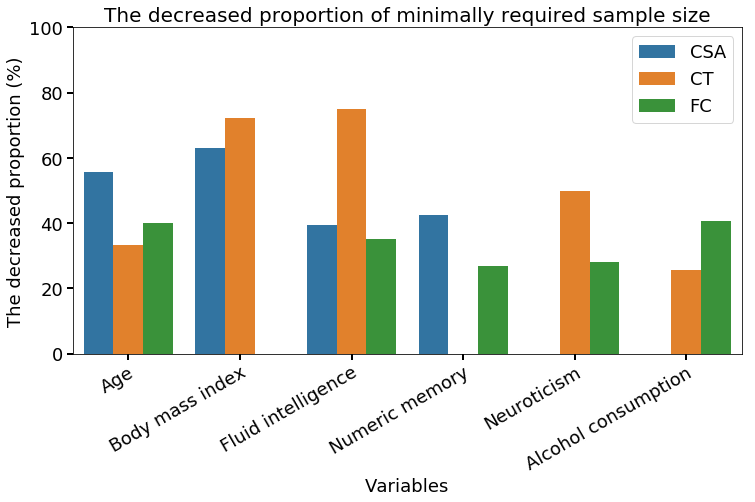

In [88]:
# Show the decreased porportion of required sample sizes in two sample t test by 25% sample pre-selection
df2 = pd.DataFrame(data=de_sample_sizes_proportions,columns=['Decreased minimal sample size'])
df2['trait'] = my_traits
df2['group'] = groups

fig = plt.figure(figsize=(12,6)) 
ax = sns.barplot(x='trait', y='Decreased minimal sample size', hue='group',data=df2)
plt.title("The decreased proportion of minimally required sample size",fontsize=20)
plt.tick_params(direction='out', length=6, width=2,labelsize=18)
plt.ylabel('The decreased proportion (%)',fontsize=18)
plt.xlabel('Variables',fontsize=18)
x = np.arange(0,6)
plt.ylim([0, 100])
plt.xticks(x,xlabels[:6],rotation=30, rotation_mode="anchor", ha="right")
plt.legend(prop={'size': 18},)
output_path = 'statistical_figures/Decreased minimal sample size_percentage.png'
fig.savefig(output_path,dpi=300,bbox_inches = 'tight')

In [89]:
de_sample_sizes = []
de_sample_sizes_proportions = []
groups = []
my_traits = []

for i in range(required_sample_sizes.shape[0]):
    
    x1 = required_sample_sizes['correlations'].iloc[i]
    x2 = required_sample_sizes['ttest_0.5'].iloc[i]
    
    if x1 == -1 or x2 == -1:
        de_sample_sizes.append(0)
        de_sample_sizes_proportions.append(0)
    else:
        de_sample_sizes.append(x1 - x2)
        de_sample_sizes_proportions.append(100*(x1-x2)/x1)
    groups.append(required_sample_sizes['imaging_type'].iloc[i])
    my_traits.append(xlabels[i%6])

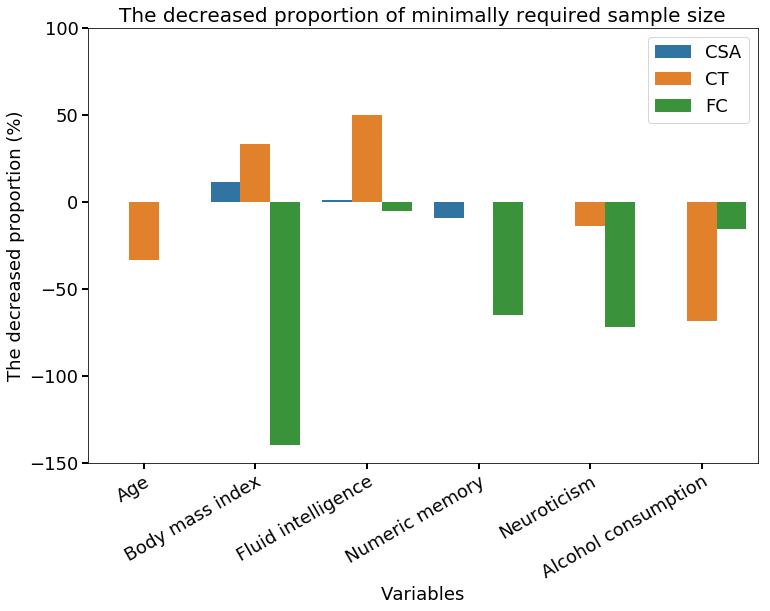

In [90]:
# Show the decreased porportion of required sample sizes in two sample t test by 50% sample pre-selection
df2 = pd.DataFrame(data=de_sample_sizes_proportions,columns=['Decreased minimal sample size'])
df2['trait'] = my_traits
df2['group'] = groups

fig = plt.figure(figsize=(12,8)) 
ax = sns.barplot(x='trait', y='Decreased minimal sample size', hue='group',data=df2)
plt.title("The decreased proportion of minimally required sample size",fontsize=20)
plt.tick_params(direction='out', length=6, width=2,labelsize=18)
plt.ylabel('The decreased proportion (%)',fontsize=18)
plt.xlabel('Variables',fontsize=18)
x = np.arange(0,6)
plt.ylim([-150, 100])
plt.xticks(x,xlabels[:6],rotation=30, rotation_mode="anchor", ha="right")
plt.legend(prop={'size': 18},)
output_path = 'statistical_figures/Decreased minimal sample size_percentage2.png'
fig.savefig(output_path,dpi=300,bbox_inches = 'tight')